<a href="https://colab.research.google.com/github/Muhamad-Nady/Kaggle-Competitions/blob/main/spare_parts_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import dependencies
import pandas as pd
import numpy as np
from datetime import date
import calendar
import regex
import io
import xlrd

In [ ]:
!pip install pandas==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Spare_parts.xlsx to Spare_parts.xlsx


In [ ]:
#import Lonati data as data and our data as df, M3 data as active_machine
data = pd.read_excel("/content/Lonati_catalog.xlsx")
df = pd.read_excel("/content/Consumed spare parts.xlsx")
active_machine = pd.read_excel("/content/CH457_20220728_161240.xls")


In [ ]:
#Handling M3 data
#Create a list by num of active machine daily
active_machine.drop(active_machine[active_machine["Knitting Net"] == 0].index,
                    inplace=True)
Num_actv = active_machine.groupby(["Transaction Date"])["Knitting Machine"].count()
Num_actv = Num_actv[91:]

In [ ]:
#preparing price list and cleaing lonati data
data["Price"] = data["price"].str.replace(",", "").astype(np.float64)
data.drop(columns = ["Unnamed: 0", "price"], inplace = True, axis = 1)
data["Price"] = data["Price"].divide(100000)
data.rename(columns = {"part":"Part"}, inplace=True)

In [ ]:
# Insert WeekDay for hour data maching the date
Weekday = []
for my_date in df["Date"]:
    Weekday.append(calendar.day_name[my_date.weekday()])
df["WeekDay"] = Weekday

In [ ]:
# Join price list from lonati data to actual consumped spare parts df
df["Price"] = None
l = []
for i, part in enumerate(df["Part"]):
    price = data[data["Part"] == (str(part) or part or int(part))]["Price"]
    if price.empty == True:
        price = 0
    df["Price"][i] = float(price)
    l.append(price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Calculate total price for every item QTY to each date
df["TotalPrice"] = df["Price"] * df["QTY"]

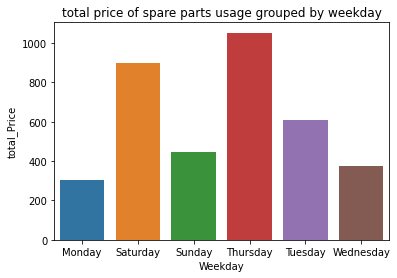

In [ ]:
# Importing Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Visulaise Evey day sparte parts useage by item and total price
itemsPrices = df.groupby("WeekDay")["TotalPrice"].sum()
ax = sns.barplot(x=itemsPrices.index, y=itemsPrices.values)
ax.set(xlabel='Weekday', ylabel='total_Price',
       title="total price of spare parts usage grouped by weekday")
plt.show()

In [ ]:
#Looking for Thurday parts ordered by largest QTY
dt = df[df["WeekDay"]=="Thursday"].groupby("Part")[["Part","TotalPrice"]].sum()
dt["QTY"] = df[df["WeekDay"]=="Thursday"].groupby("Part")[["Part","QTY"]].sum()


In [ ]:
dt.sort_values(by="TotalPrice", ascending=False)

,Part,TotalPrice,QTY
Part,,,
G3010010,G3010010G3010010G3010010G3010010G3010010G30100...,273.00000,700
G3010009,G3010009G3010009G3010009G3010009G3010009G30100...,253.50000,650
G2900612,G2900612,220.47000,1
G2050014,G2050014G2050014G2050014G2050014,78.34600,86
379380,758760,40.50000,3
D4080417,D4080417,32.32500,1
G1080208,G1080208G1080208,21.60000,2
G1920665,G1920665,19.46000,2
G2080001,G2080001G2080001G2080001G2080001G2080001G20800...,16.50720,15


######The displayed graph show total amount of money consuped in spare parts usage since 22th of April to the beginning of July groupby weekday, it's obevous that the most used spare parts in Thursday. and it's high because of


1.   Using to many electoring part {G2900612: Drum, 379380:Drum Lever}
2.   Using high Qty of needles






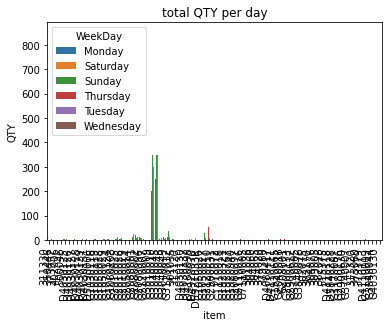

In [ ]:
#visualize the commen item per each day
CommenItem = df.groupby(["WeekDay","Part"])["QTY"].sum()
ax1 = sns.barplot(x=CommenItem.index.get_level_values(1),
                  y=CommenItem.values,
                  hue=CommenItem.index.get_level_values(0))
ax1.set(xlabel="item", ylabel="QTY",
        title="total QTY per day")
ax1.set_xticklabels(ax1.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
plt.show()

In [ ]:
CommenItem = df.groupby(["WeekDay","Part"])["QTY"].sum()
CommenItem.sort_values(ascending=False).head(30)
#CommenItem.values

WeekDay    Part    
Saturday   G3010010    850
Thursday   G3010010    700
Saturday   G3010009    650
Thursday   G3010009    650
Tuesday    G3010010    350
Sunday     G3010009    350
           G3010010    350
Tuesday    G3010009    300
Wednesday  G3010010    250
Monday     G3010010    250
Wednesday  G3010009    200
Monday     G3010009    200
Thursday   G2050014     86
           G1050026     51
           G1050027     51
           G1050028     50
           G1050029     50
Sunday     G3040049     37
Wednesday  G2050014     33
Thursday   G3040045     32
Sunday     G1050026     29
           G1050027     27
Tuesday    G2050014     25
Saturday   G1050029     22
           G1050028     22
Monday     G2080001     21
Saturday   G2050014     20
Wednesday  G2080002     19
Saturday   G3040049     19
Thursday   G2080001     15
Name: QTY, dtype: int64

## here is a small visualization for top items used per day accprding to chart, needle, sinker, hooks, Onchine, bins

In [ ]:
#ConvertCommen Item series to datafram
CommenItem = pd.DataFrame(CommenItem)

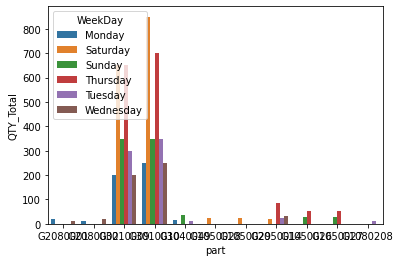

In [ ]:
# Retrive most used spare part per each day
nlargestitems = []
for i in CommenItem.index.get_level_values(0).unique():
    nlargestitem = CommenItem[CommenItem.index.get_level_values(0)==i]["QTY"].nlargest(5)
    nlargestitems.append(nlargestitem) 
    
    
nlargestitems_df = pd.DataFrame(data = nlargestitems)
nlargestitems_df = nlargestitems_df.transpose() 
# Fill null to zero
nlargestitems_df = nlargestitems_df.fillna(0)
nlargestitems_df["QTY_Total"] = nlargestitems_df.sum(axis=1)
nlargestitems_df = nlargestitems_df.drop(labels="QTY", axis = 1)
nlargestitems_df = nlargestitems_df.groupby([nlargestitems_df.index.get_level_values(0),
                                            nlargestitems_df.index.get_level_values(1)]).sum()
nlargestitems_df["part"] = nlargestitems_df.index.get_level_values(1)

#Visualize the most used spare parts per each day
ax1 = sns.barplot(data = nlargestitems_df, 
                  x = nlargestitems_df["part"],
                  y = nlargestitems_df["QTY_Total"],
                  hue = nlargestitems_df.index.get_level_values(0))

##it's a visualiztion for top 5 items used per each day

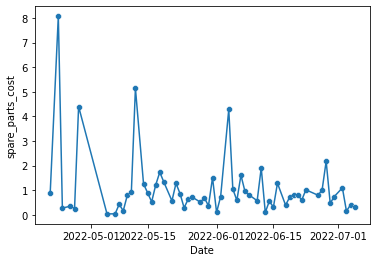

In [ ]:
#Visualize Sapre parts money consumption time series
TotalPrice_day = df.groupby("Date")["TotalPrice"].sum()
Num_actv = Num_actv[:59]
for i, value in enumerate(Num_actv.values):
    if value < 20:
        Num_actv[i] = 50
        
price_capta = TotalPrice_day.values/Num_actv[0:58].values
ax2 = sns.lineplot(
               x = TotalPrice_day.index, 
               y = price_capta)
ax2 = sns.scatterplot(x = TotalPrice_day.index, 
                 y = price_capta);
ax2.set(label="cost of daily used spare parts per machine",
        xlabel="Date",
        ylabel="spare_parts_cost")
plt.show()

In [ ]:
def avg(x):
  return sum(x)/len(x)
avg(price_capta)

1.0767753232995827

## It's a visualizatin for spare part money consuption per machine on one day it's obevouis that the chart has a downtred and this refect the machine stability and mechanic awarness, and raising level of mechanic team, we have high flacuatin between days. trending to make the consumption stable and manimize at could it possible.
### average cost for spare part per one machine about 1.0767753232995827EUR per day

In [ ]:
# Retrive list by mosed used spare parts for nuatils
nautils = df.groupby("Part")["QTY"].sum().nlargest(30)
# writitng the list of most used spare part to excel
nautils.to_frame(name="nautils").to_excel("nautils.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        402 non-null    datetime64[ns]
 1   Delta Item  339 non-null    object        
 2   Part        402 non-null    object        
 3   QTY         402 non-null    int64         
 4   Location    402 non-null    object        
 5   Mechanic    402 non-null    object        
 6   WeekDay     402 non-null    object        
 7   Price       402 non-null    object        
 8   TotalPrice  402 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 28.4+ KB


In [ ]:
# Predcit sapre parts money consumption
X_data = df.iloc[:, [0,9]]
y_data = df.iloc[:, 10]

# Bulding the model
from sklearn import svm
reg = svm.SVR()
reg.fit(X_data, y_data)